In [66]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [67]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [68]:
print("Train length :", len(X_train))
print("Test length :", len(X_test))

Train length : 60000
Test length : 10000


In [69]:
X_train[0].shape

(28, 28)

In [70]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

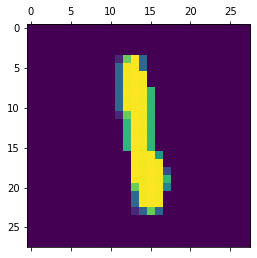

In [71]:
plt.matshow(X_train[200])

In [72]:
y_train[200]

1

In [73]:
X_train = X_train / 255
X_test = X_test / 255

In [74]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [75]:
X_train_flattened.shape

(60000, 784)

In [76]:
X_test_flattened.shape

(10000, 784)

In [77]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [78]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4730 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.2837 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 897us/step - loss: 0.2730 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 893us/step - loss: 0.2666 - accuracy: 0.9256


In [79]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 0s 731us/step - loss: 0.2716 - accuracy: 0.9239


[0.2716495394706726, 0.9239000082015991]

In [80]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 629us/step


array([4.8268732e-04, 9.9362642e-01, 6.9608927e-01, 3.3317888e-01,
       3.7805889e-02, 8.7296858e-02, 2.1809632e-01, 1.5352245e-01,
       4.2287517e-01, 4.7689326e-02], dtype=float32)

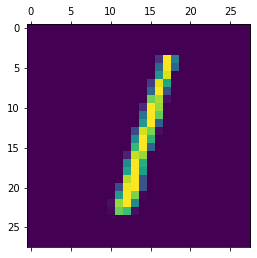

In [81]:
plt.matshow(X_test[2])

In [82]:
np.argmax(y_predicted[2])

1

In [83]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [84]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [85]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    7,    3,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   8,    9,  917,   19,   11,    2,   13,   11,   39,    3],
       [   4,    0,   15,  931,    1,   19,    3,   10,   19,    8],
       [   1,    1,    2,    1,  932,    0,   12,    3,    9,   21],
       [  13,    3,    3,   42,   12,  746,   20,    9,   39,    5],
       [  12,    3,    6,    1,    7,    7,  918,    2,    2,    0],
       [   2,    5,   21,    7,    8,    0,    0,  959,    2,   24],
       [   7,    8,    7,   26,   10,   21,   10,   14,  866,    5],
       [  11,    7,    1,   12,   45,    5,    0,   32,    4,  892]])>

Text(69.0, 0.5, 'Real')

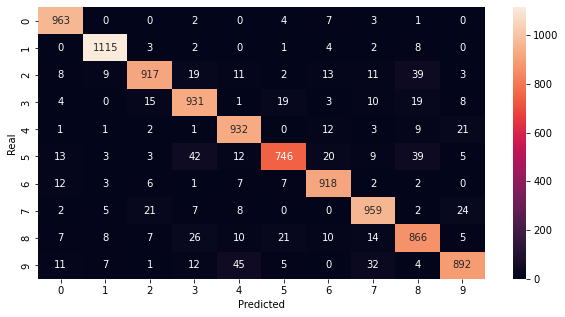

In [86]:
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [87]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1259 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0526 - accuracy: 0.9840


In [88]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 887us/step - loss: 0.0842 - accuracy: 0.9746


[0.08416806906461716, 0.9746000170707703]

313/313 [==============================] - 0s 738us/step


Text(69.0, 0.5, 'Real')

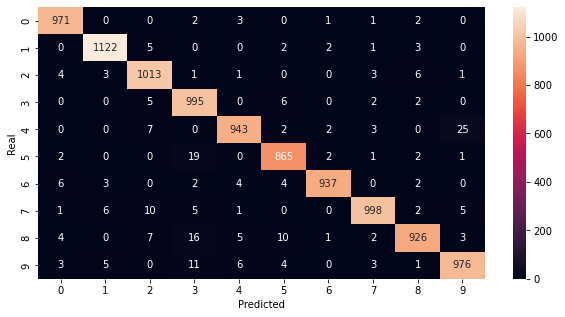

In [89]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [90]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2467 - accuracy: 0.9288
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1057 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0727 - accuracy: 0.9781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0406 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [91]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0850 - accuracy: 0.9797


[0.0849686935544014, 0.9797000288963318]

In [95]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6614 - accuracy: 0.8335
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3365 - accuracy: 0.9069
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2870 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2572 - accuracy: 0.9275
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2350 - accuracy: 0.9340
